In [1]:
import seaborn as sns
sns.set_theme(style="white", palette="muted", font_scale=0.8)

import mpl_fontkit as fk
# 1. Install and register Inter
fk.install("Inter")  
fk.set_font("Inter")  

import matplotlib.pyplot as plt

# # — Use TrueType embedding (requires matplotlib≥3.10.1):
# plt.rcParams['pdf.fonttype'] = 3
# plt.rcParams['ps.fonttype']  = 3


# Set the default font size for all plots
plt.rcParams['font.size'] = 10

textwidth = 6.32283  # inches from 455,24411 pt textwidth in the document
# set default figure width to textwidth
plt.rcParams['figure.figsize'] = (textwidth, textwidth * 0.618)  # golden ratio
plt.rcParams['figure.dpi'] = 300  # high-quality output

color_array = sns.color_palette("muted", 10)

Font name: `Inter`


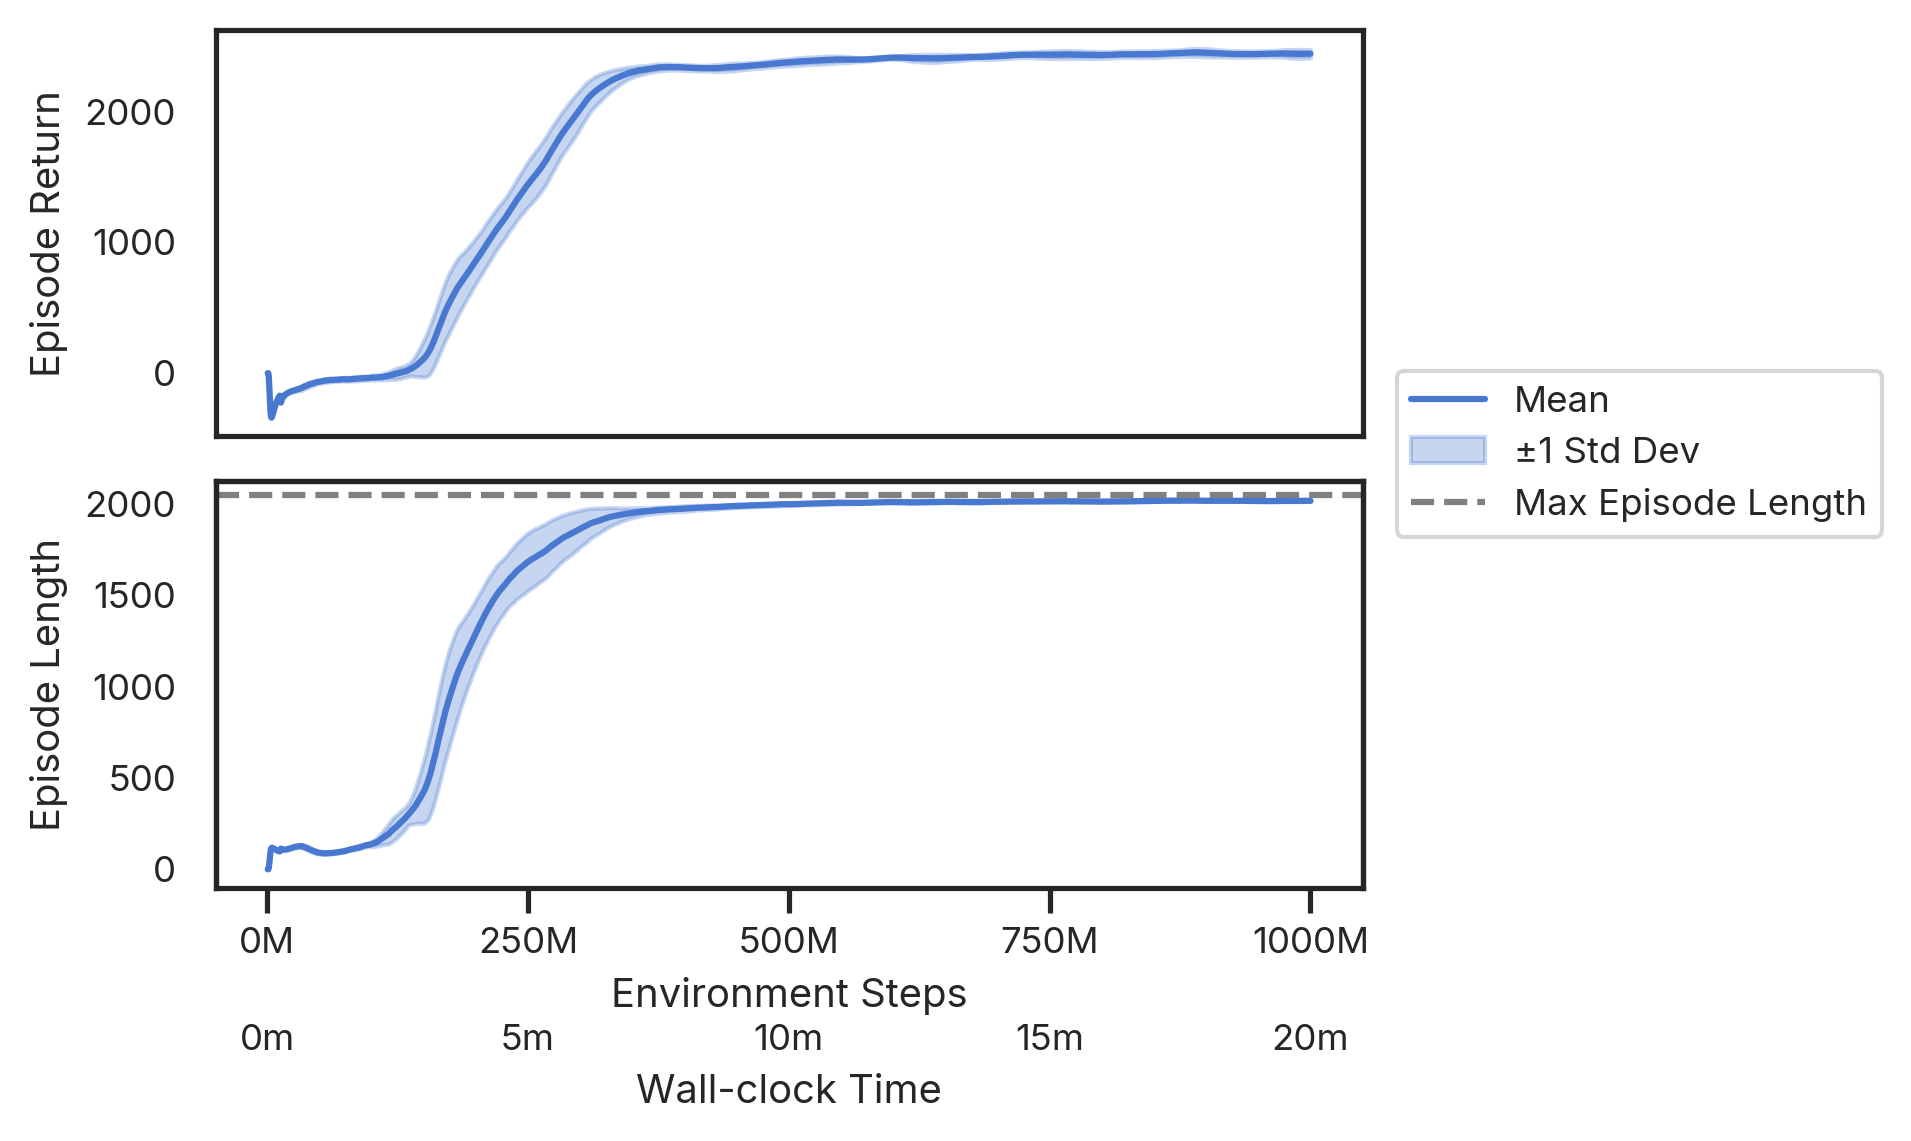

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

def plot_train_metrics(csv_path, width=textwidth):
    # Load data
    df = pd.read_csv(csv_path)
    
    # Identify relevant columns
    returns_cols = [c for c in df.columns if c.endswith('returned_episode_returns')]
    lengths_cols = [c for c in df.columns if c.endswith('returned_episode_lengths')]
    
    # Extract steps and compute stats
    steps = df['env_step'].values
    max_step = steps.max()
    mean_returns = df[returns_cols].mean(axis=1).values
    std_returns = df[returns_cols].std(axis=1).values
    mean_lengths = df[lengths_cols].mean(axis=1).values
    std_lengths = df[lengths_cols].std(axis=1).values
    
    # Shared tick positions (5 ticks)
    env_ticks = np.linspace(0, max_step, 5)
    
    # Total wall-clock seconds (20m40s = 1240s)
    total_time_sec = 20 * 60 + 40
    
    # Formatter for environment steps (millions)
    steps_fmt = FuncFormatter(lambda x, pos: f"{x/1e6:.0f}M")
    # Formatter for wall-clock time (minutes)
    time_fmt = FuncFormatter(lambda x, pos: f"{int((x/max_step*total_time_sec)//60)}m")
    
    # Create vertical stack, share x-axis
    fig, axes = plt.subplots(
        nrows=2, ncols=1,
        figsize=(width, width * 0.618 ),
        sharex=True
    )
    
    # Data and labels for each subplot
    plot_data = [
        (mean_returns, std_returns, 'Episode Return', False),
        (mean_lengths, std_lengths, 'Episode Length', True),
    ]
    
    for ax, (mean, std, ylabel, draw_max) in zip(axes, plot_data):
        # Plot mean ± std
        ax.plot(steps, mean, label='Mean', color='C0')
        ax.fill_between(steps, mean - std, mean + std,
                        color='C0', alpha=0.3, label='±1 Std Dev')
        
        # Optional max-length line
        if draw_max:
            ax.axhline(2048, linestyle='--', color='gray', label='Max Episode Length')

        # Environment-steps axis
        ax.set_ylabel(ylabel)
        ax.xaxis.set_major_formatter(steps_fmt)
        ax.set_xticks(env_ticks)
        
    # Secondary wall-clock axis
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.spines['bottom'].set_position(('axes', -.3))
    ax2.spines['bottom'].set_visible(False)
    ax2.xaxis.set_ticks_position('bottom')
    ax2.xaxis.set_label_position('bottom')
    ax2.set_xlabel('Wall-clock Time')
    ax2.set_xticks(env_ticks)
    ax2.xaxis.set_major_formatter(time_fmt)
    ax2.tick_params(axis='x', length=0)
    
    # Shared X label on bottom subplot
    axes[-1].set_xlabel('Environment Steps')
    
    # Consolidate legend to the right of the plots
    handles, labels = axes[1].get_legend_handles_labels()
    fig.legend(
        handles, labels,
        loc='center right',
        bbox_to_anchor=(1, 0.6),
        borderaxespad=0
    )
    
    # Adjust layout to make room for legend
    fig.tight_layout(rect=[0, 0, 0.75, 1])
    return fig

fig = plot_train_metrics('train_metrics.csv') 

# Save the figure
fig.savefig('out/train_metrics.pdf', bbox_inches='tight')